**Libraries**


In [1]:
# Import necessary libraries
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Mounting Drive & Defining Paths**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Loading & Augmentation**

In [4]:
# Define test directory and load data
test_dir = "/content/drive/MyDrive/LungCancerSplit/test"

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data order for consistent evaluation
)

# Paths to models and CSV logs
model_paths = [
    "/content/drive/MyDrive/LungCancer_CNN_model_v2.h5",
    "/content/drive/MyDrive/LungCancer_VGG16_model_v2.h5",
    "/content/drive/MyDrive/LungCancer_InceptionV3_model_v2.h5",
    "/content/drive/MyDrive/LungCancer_ResNet50_model_v2.h5",
    "/content/drive/MyDrive/LungCancer_CNN_model_v3.h5",
]

log_paths = [
    "/content/drive/MyDrive/training_CNN_log_v2.csv",
    "/content/drive/MyDrive/training_VGG16_log_v2.csv",
    "/content/drive/MyDrive/training_InceptionV3_log_v2.csv",
    "/content/drive/MyDrive/training_ResNet50_log_v2.csv",
    "/content/drive/MyDrive/training_CNN_log_v3.csv",
]

# Load models
models = [tf.keras.models.load_model(path) for path in model_paths]

Found 2250 images belonging to 3 classes.


**Models: Summary & Evaluations**

**Model 1 : CNN**

Evaluating Model 1 (CNN) (LungCancer_CNN_model_v2.h5)...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_94 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_95 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_96 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │         200,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,277 (1.14 MB)

 Trainable params: 298,275 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step

Classification Report for Model 1 (CNN):
                         precision    recall  f1-score   support

         adenocarcinoma       0.78      0.88      0.83       750
                 benign       1.00      0.95      0.97       750
squamous_cell_carcinoma       0.88      0.81      0.84       750

               accuracy                           0.88      2250
              macro avg       0.89      0.88      0.88      2250
           weighted avg       0.89      0.88      0.88      2250



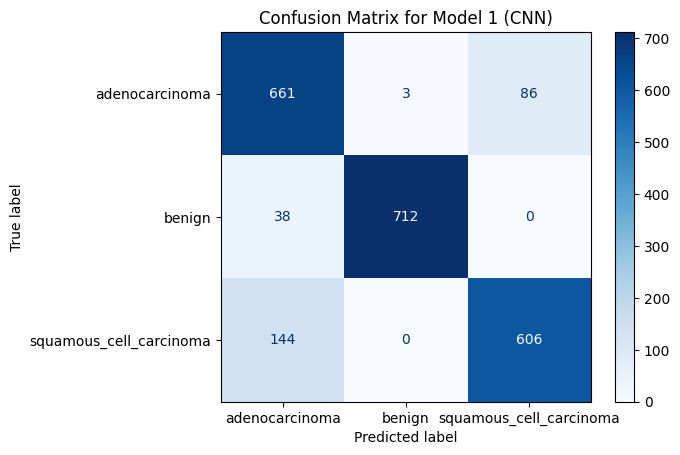

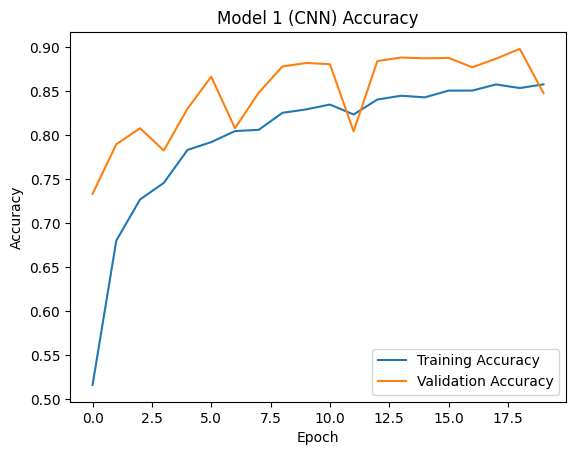

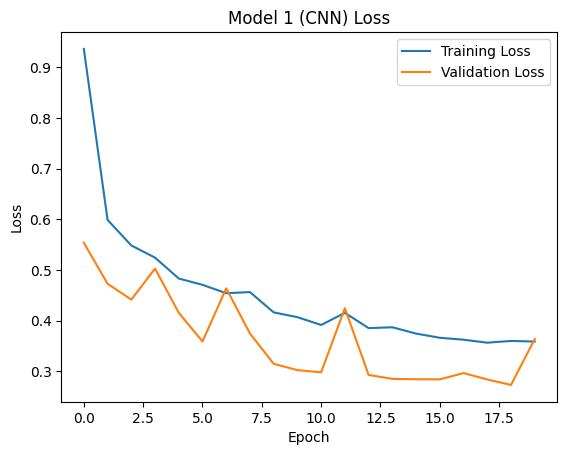

In [5]:
# Model 1: Paths
model_path = "/content/drive/MyDrive/LungCancer_CNN_model_v2.h5"
log_path = "/content/drive/MyDrive/training_CNN_log_v2.csv"

# Load Model 1
model = tf.keras.models.load_model(model_path)

# Print Model Summary
print(f"Evaluating Model 1 (CNN) ({os.path.basename(model_path)})...")
model.summary()

# Predict using Model 1
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report for Model 1 (CNN):")
print(classification_report(test_generator.classes, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for Model 1 (CNN)")
plt.show()

# Load Training History for Model 1
history = pd.read_csv(log_path)

# Plot Accuracy
plt.figure()
plt.plot(history['epoch'], history['accuracy'], label='Training Accuracy')
plt.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Model 1 (CNN) Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(history['epoch'], history['loss'], label='Training Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.title(f"Model 1 (CNN) Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model 2: VGG16**

Evaluating Model 2 (VGG16) (LungCancer_VGG16_model_v2.h5)...


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       8,389,632 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,630,661 (90.14 MB)

 Trainable params: 23,630,659 (90.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step

Classification Report for Model 2 (VGG16):
                         precision    recall  f1-score   support

         adenocarcinoma       1.00      1.00      1.00       750
                 benign       1.00      1.00      1.00       750
squamous_cell_carcinoma       1.00      1.00      1.00       750

               accuracy                           1.00      2250
              macro avg       1.00      1.00      1.00      2250
           weighted avg       1.00      1.00      1.00      2250



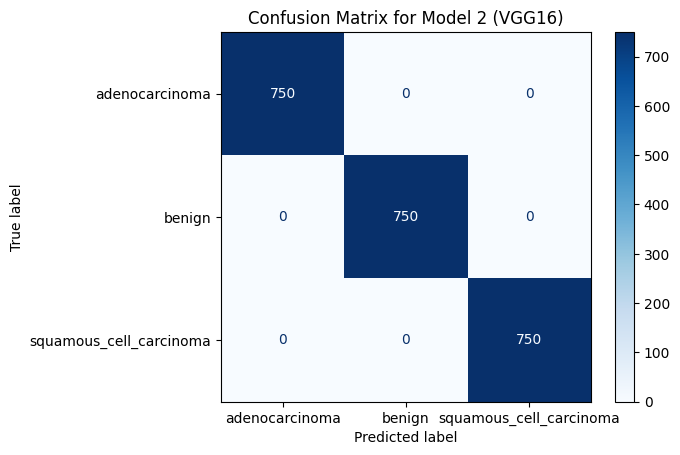

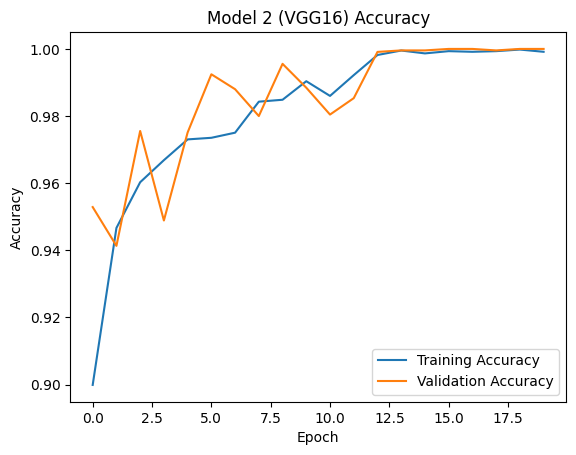

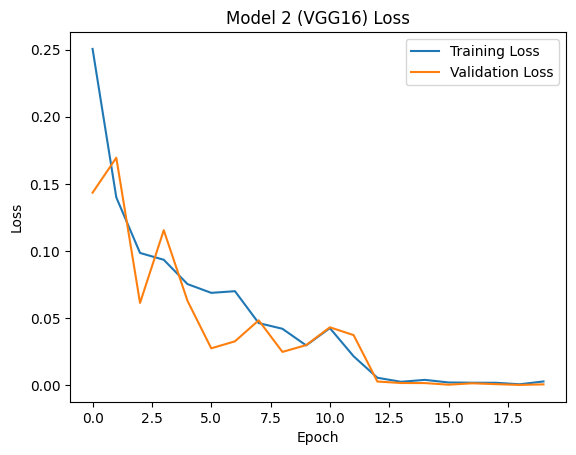

In [6]:
# Model 2: Paths
model_path = "/content/drive/MyDrive/LungCancer_VGG16_model_v2.h5"
log_path = "/content/drive/MyDrive/training_VGG16_log_v2.csv"

# Load Model 2
model = tf.keras.models.load_model(model_path)

# Print Model Summary
print(f"Evaluating Model 2 (VGG16) ({os.path.basename(model_path)})...")
model.summary()

# Predict using Model 2
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report for Model 2 (VGG16):")
print(classification_report(test_generator.classes, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for Model 2 (VGG16)")
plt.show()

# Load Training History for Model 2
history = pd.read_csv(log_path)

# Plot Accuracy
plt.figure()
plt.plot(history['epoch'], history['accuracy'], label='Training Accuracy')
plt.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Model 2 (VGG16) Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(history['epoch'], history['loss'], label='Training Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.title(f"Model 2 (VGG16) Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model 3: InceptionV3**

Evaluating Model 3 (InceptionV3) (LungCancer_InceptionV3_model_v2.h5)...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 24,427,301 (93.18 MB)

 Trainable params: 7,780,547 (29.68 MB)

 Non-trainable params: 16,646,752 (63.50 MB)

 Optimizer params: 2 (12.00 B)

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step

Classification Report for Model 3 (InceptionV3):
                         precision    recall  f1-score   support

         adenocarcinoma       0.98      0.99      0.98       750
                 benign       1.00      1.00      1.00       750
squamous_cell_carcinoma       0.99      0.98      0.98       750

               accuracy                           0.99      2250
              macro avg       0.99      0.99      0.99      2250
           weighted avg       0.99      0.99      0.99      2250



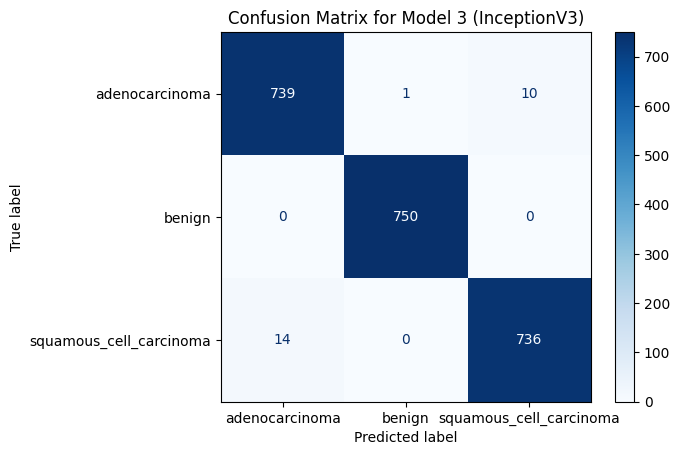

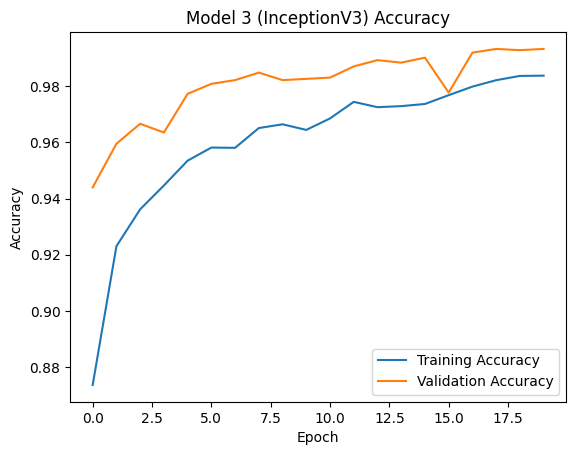

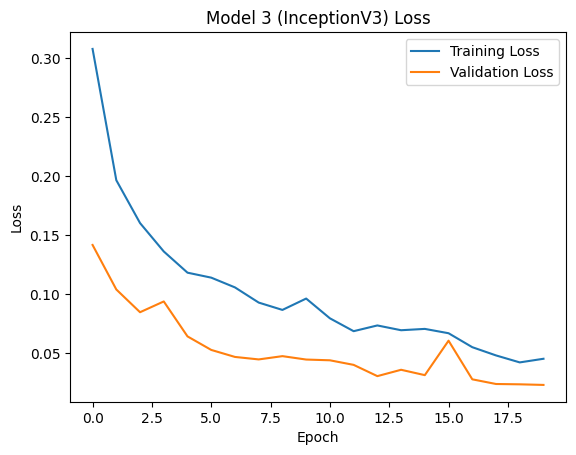

In [7]:
# Model 3: Paths
model_path = "/content/drive/MyDrive/LungCancer_InceptionV3_model_v2.h5"
log_path = "/content/drive/MyDrive/training_InceptionV3_log_v2.csv"

# Load Model 3
model = tf.keras.models.load_model(model_path)

# Print Model Summary
print(f"Evaluating Model 3 (InceptionV3) ({os.path.basename(model_path)})...")
model.summary()

# Predict using Model 3
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report for Model 3 (InceptionV3):")
print(classification_report(test_generator.classes, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for Model 3 (InceptionV3)")
plt.show()

# Load Training History for Model 3
history = pd.read_csv(log_path)

# Plot Accuracy
plt.figure()
plt.plot(history['epoch'], history['accuracy'], label='Training Accuracy')
plt.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Model 3 (InceptionV3) Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(history['epoch'], history['loss'], label='Training Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.title(f"Model 3 (InceptionV3) Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model 4: ResNet50**

Evaluating Model 4 (ResNet50) (LungCancer_ResNet50_model_v2.h5)...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 26,212,229 (99.99 MB)

 Trainable params: 17,074,691 (65.13 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

 Optimizer params: 2 (12.00 B)

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step

Classification Report for Model 4 (ResNet50):
                         precision    recall  f1-score   support

         adenocarcinoma       0.91      0.81      0.86       750
                 benign       0.99      0.99      0.99       750
squamous_cell_carcinoma       0.84      0.93      0.88       750

               accuracy                           0.91      2250
              macro avg       0.91      0.91      0.91      2250
           weighted avg       0.91      0.91      0.91      2250



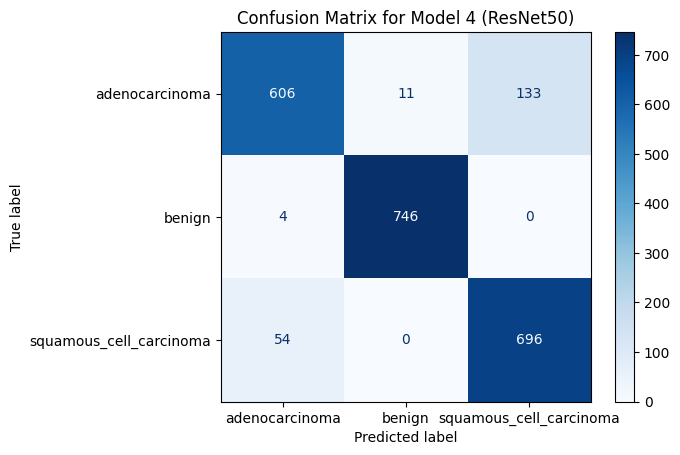

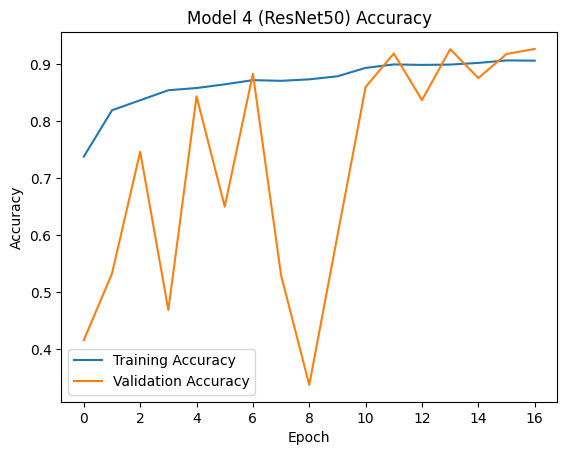

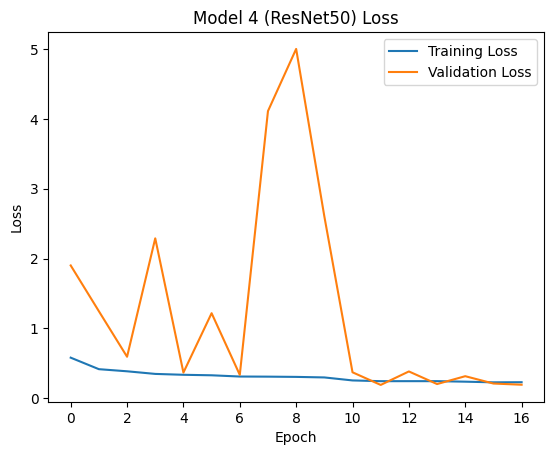

In [8]:
# Model 4: Paths
model_path = "/content/drive/MyDrive/LungCancer_ResNet50_model_v2.h5"
log_path = "/content/drive/MyDrive/training_ResNet50_log_v2.csv"

# Load Model 4
model = tf.keras.models.load_model(model_path)

# Print Model Summary
print(f"Evaluating Model 4 (ResNet50) ({os.path.basename(model_path)})...")
model.summary()

# Predict using Model 4
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report for Model 4 (ResNet50):")
print(classification_report(test_generator.classes, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for Model 4 (ResNet50)")
plt.show()

# Load Training History for Model 4
history = pd.read_csv(log_path)

# Plot Accuracy
plt.figure()
plt.plot(history['epoch'], history['accuracy'], label='Training Accuracy')
plt.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Model 4 (ResNet50) Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(history['epoch'], history['loss'], label='Training Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.title(f"Model 4 (ResNet50) Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model 5 : CNN V2**

Evaluating Model 5 (CNN_V2) (LungCancer_CNN_model_v3.h5)...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,005,317 (7.65 MB)

 Trainable params: 2,003,971 (7.64 MB)

 Non-trainable params: 1,344 (5.25 KB)

 Optimizer params: 2 (12.00 B)

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step

Classification Report for Model 5 (CNN_V2):
                         precision    recall  f1-score   support

         adenocarcinoma       1.00      1.00      1.00       750
                 benign       1.00      1.00      1.00       750
squamous_cell_carcinoma       1.00      1.00      1.00       750

               accuracy                           1.00      2250
              macro avg       1.00      1.00      1.00      2250
           weighted avg       1.00      1.00      1.00      2250



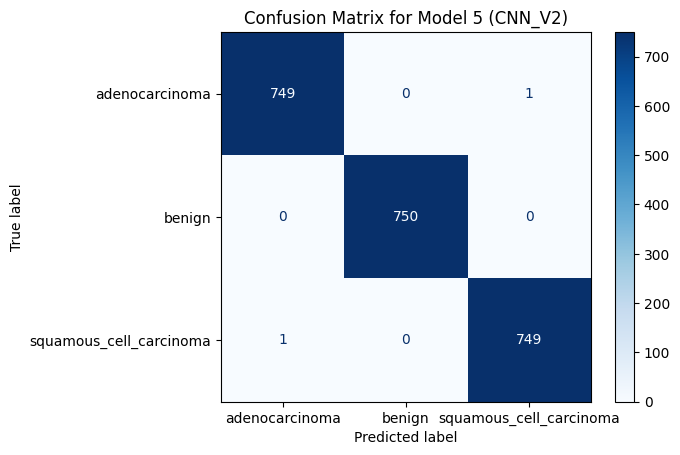

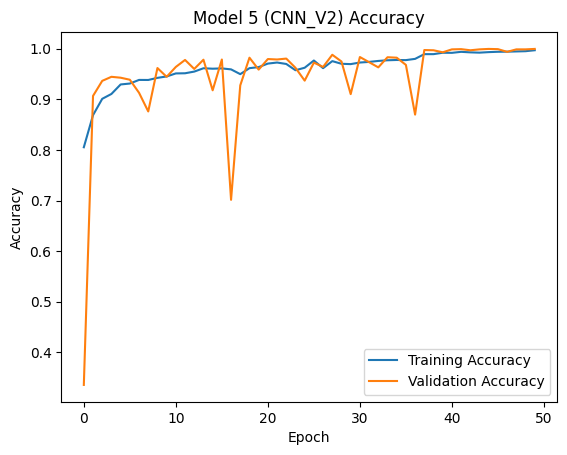

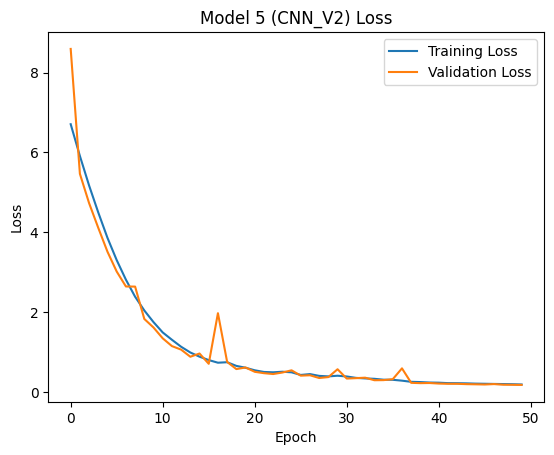

In [6]:
# Model 5: Paths
model_path = "/content/drive/MyDrive/LungCancer_CNN_model_v3.h5"
log_path = "/content/drive/MyDrive/training_CNN_log_v3.csv"

# Load Model 5
model = tf.keras.models.load_model(model_path)

# Print Model Summary
print(f"Evaluating Model 5 (CNN_V2) ({os.path.basename(model_path)})...")
model.summary()

# Predict using Model 5
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report for Model 5 (CNN_V2):")
print(classification_report(test_generator.classes, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f"Confusion Matrix for Model 5 (CNN_V2)")
plt.show()

# Load Training History for Model 5
history = pd.read_csv(log_path)

# Plot Accuracy
plt.figure()
plt.plot(history['epoch'], history['accuracy'], label='Training Accuracy')
plt.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Model 5 (CNN_V2) Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(history['epoch'], history['loss'], label='Training Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.title(f"Model 5 (CNN_V2) Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()